Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense or another) to each other than to those in other groups (clusters).

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sn
%matplotlib inline

In [4]:
from sklearn.datasets.samples_generator import make_blobs

In [3]:
X, y = make_blobs(n_samples=300, centers=3,  # defult x has 2 values**
                random_state=0, cluster_std=0.60) #Generate isotropic Gaussian blobs for clustering.

In [4]:
X[0:5]

array([[ 0.42857674,  4.9739971 ],
       [ 1.61990909,  0.06764529],
       [ 1.43289271,  4.37679234],
       [-1.57846247,  3.03445802],
       [-1.65862863,  2.26746029]])

In [5]:
y[0:5]

array([0, 1, 0, 2, 2])

In [6]:
all_points = pd.concat( [pd.DataFrame( X ),
                       pd.DataFrame( y ) ],
                     axis = 1 )

In [7]:
all_points.columns = ["x1", "x2", "y"]

In [8]:
all_points[0:5]

,x1,x2,y
0,0.428577,4.973997,0
1,1.619909,0.067645,1
2,1.432893,4.376792,0
3,-1.578462,3.034458,2
4,-1.658629,2.267460,2


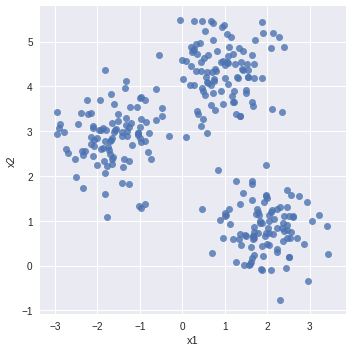

In [9]:
sn.lmplot( "x1", "x2", data=all_points, fit_reg=False, size = 5 )

In [10]:
#Can a clustering algorithm group them together by how nearer they are to each other

Using K-means clustering technique

    k-mean calculates the distance between the points and the center using euclidean distance and then allocates the points to different clusters.


In [11]:
from sklearn.cluster import KMeans

In [12]:
X = all_points[["x1", "x2"]]
clusters = KMeans(3)  # 3 clusters
clusters.fit( X )

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [13]:
#k-means clustering has figured out the cluster centers and assigned each points to the cluster centers.

In [14]:
clusters.cluster_centers_

array([[ 0.95625704,  4.37226546],
       [-1.60811992,  2.85881658],
       [ 1.95159369,  0.83467497]])

In [15]:
clusters.labels_

array([0, 2, 0, 1, 1, 1, 2, 0, 1, 1, 2, 2, 2, 0, 2, 1, 0, 0, 1, 2, 1, 0, 2,
       0, 1, 1, 0, 1, 2, 2, 1, 0, 0, 2, 2, 1, 2, 1, 0, 2, 1, 2, 0, 2, 2, 1,
       2, 1, 1, 2, 1, 2, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2, 0, 1, 2, 1, 0, 2, 0,
       2, 1, 1, 1, 1, 2, 0, 2, 1, 0, 0, 1, 0, 2, 0, 0, 0, 2, 1, 0, 0, 1, 2,
       1, 0, 2, 2, 0, 2, 1, 0, 2, 1, 0, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 0, 1, 1, 2, 1, 0,
       1, 1, 2, 0, 2, 0, 1, 1, 0, 1, 1, 2, 0, 1, 0, 2, 1, 1, 2, 2, 0, 2, 0,
       0, 2, 0, 1, 0, 0, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 2, 0, 0, 2, 1, 0, 0,
       0, 0, 2, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0,
       1, 0, 2, 0, 0, 1, 2, 2, 2, 2, 0, 1, 2, 0, 2, 2, 2, 0, 1, 1, 0, 0, 1,
       0, 2, 2, 0, 2, 1, 1, 1, 0, 0, 2, 1, 1, 1, 1, 2, 1, 1, 0, 2, 2, 0, 2,
       2, 1, 0, 2, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0,
       1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 0, 0, 1, 2, 0,
       1], d

In [16]:
all_points["clusterid_1"] = clusters.labels_

In [17]:
all_points.head()

,x1,x2,y,clusterid_1
0,0.428577,4.973997,0,0
1,1.619909,0.067645,1,2
2,1.432893,4.376792,0,0
3,-1.578462,3.034458,2,1
4,-1.658629,2.267460,2,1


We can verify if the clustering is done properly, by coloring the point differently depending on how they are assigned to each cluster.

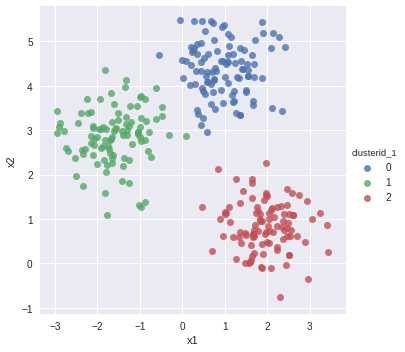

In [18]:
sn.lmplot( "x1", "x2", data=all_points,
        hue = "clusterid_1",
        fit_reg=False, size = 5 )

In [19]:
#How well the points were clustered
from sklearn.metrics import adjusted_rand_score
adjusted_rand_score(all_points.y, all_points.clusterid_1)

1.0

In [20]:
#Does the scale of dimensions impact the clustering?
all_points["x1"] = all_points.x1 * 100
all_points.head()

,x1,x2,y,clusterid_1
0,42.857674,4.973997,0,0
1,161.990909,0.067645,1,2
2,143.289271,4.376792,0,0
3,-157.846247,3.034458,2,1
4,-165.862863,2.267460,2,1


In [21]:
X = all_points[["x1", "x2"]]
clusters = KMeans(3)  # 3 clusters
clusters.fit( X )

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

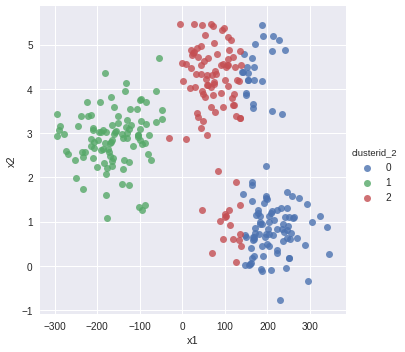

In [22]:
all_points["clusterid_2"] = clusters.labels_
sn.lmplot( "x1", "x2", data=all_points,
        hue = "clusterid_2",
        fit_reg=False, size = 5 )


It seems if the dimensions have different scale, it may impact clsutering as the distance calculated will be dominated by the dimensions with large scale.
So, in clustering the variables need to be scaled or standardized.
Scale the dimensions to remove the impact

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform( X )

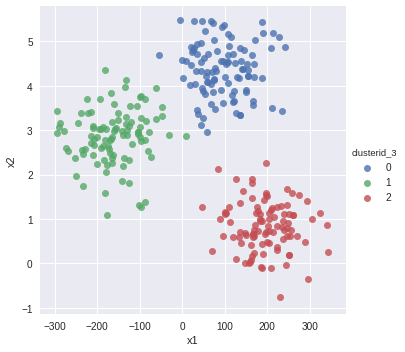

In [24]:
clusters = KMeans(3)  # 3 clusters
clusters.fit( X_scaled )
all_points["clusterid_3"] = clusters.labels_
sn.lmplot( "x1", "x2", data=all_points,
        hue = "clusterid_3",
        fit_reg=False, size = 5 )

In [38]:
clusters

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [25]:
#Can K-means work if the clusters are not well segregated.. what if the clustered are interspersed

In [26]:
from sklearn import datasets
moon_points = datasets.make_moons(n_samples=1000, noise=.05)

In [27]:
X, y = enumerate( moon_points )

In [28]:
moon_points = pd.DataFrame( X[1] )

In [29]:
moon_points.columns = ["x1", "x2"]

In [30]:
moon_points["y"] = y[1]

In [31]:
moon_points.head()

,x1,x2,y
0,1.063813,-0.547283,1
1,0.089375,0.299603,1
2,0.919262,0.110393,0
3,-0.552700,0.930232,0
4,0.756581,-0.415861,1


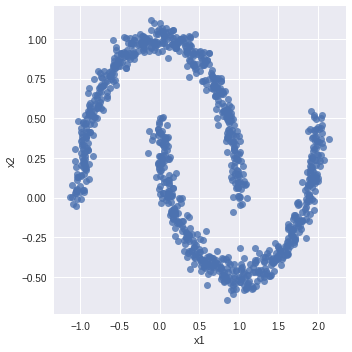

In [32]:
sn.lmplot( "x1", "x2", data=moon_points, fit_reg=False, size = 5 )

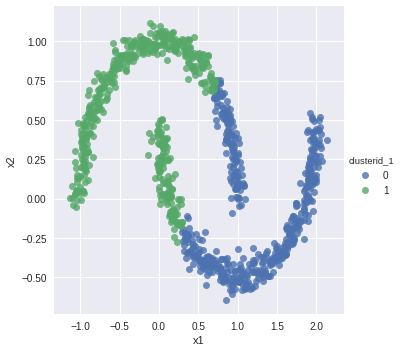

In [35]:
moon_clusters = KMeans(2)  # 3 clusters
moon_clusters.fit( moon_points[["x1", "x2"]] )
moon_points["clusterid_1"] = moon_clusters.labels_
sn.lmplot( "x1", "x2", data=moon_points,
        hue = "clusterid_1",
        fit_reg=False, size = 5 )

In [36]:
KMeans?

In [46]:
#Using DBSCAN for density based clutering

In [47]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=.2)

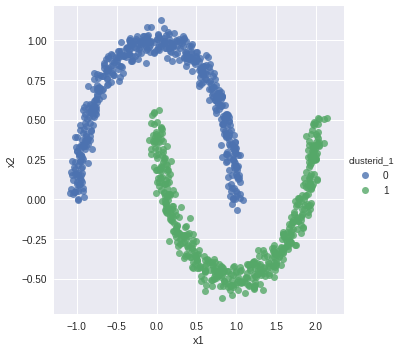

In [48]:
moon_clusters = DBSCAN( eps=.2 )
moon_clusters.fit( moon_points[["x1", "x2"]] )
moon_points["clusterid_1"] = moon_clusters.labels_
sn.lmplot( "x1", "x2", data=moon_points,
        hue = "clusterid_1",
        fit_reg=False, size = 5 )

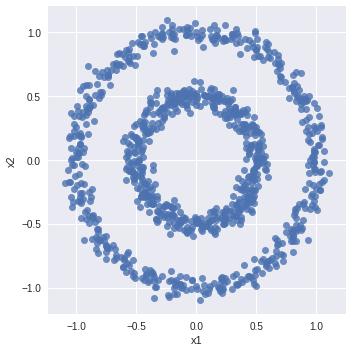

In [50]:
#Using DBSCAN for points in circles.
circle_points = datasets.make_circles(n_samples=1000, factor=.5,
                                    noise=.05)
X, y = enumerate( circle_points )
circle_points = pd.DataFrame( X[1] )
circle_points.columns = ["x1", "x2"]
circle_points["y"] = y[1]
circle_points.head()
sn.lmplot( "x1", "x2", data=circle_points, fit_reg=False, size = 5 )

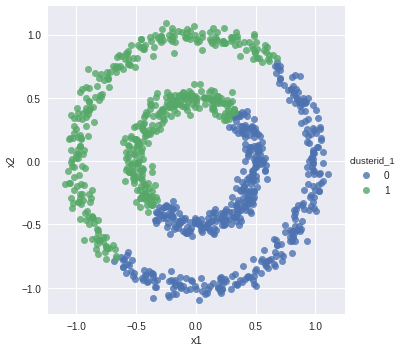

In [51]:
circle_clusters = KMeans(2)  # 3 clusters
circle_clusters.fit( circle_points[["x1", "x2"]] )
circle_points["clusterid_1"] = circle_clusters.labels_
sn.lmplot( "x1", "x2", data=circle_points,
        hue = "clusterid_1",
        fit_reg=False, size = 5 )

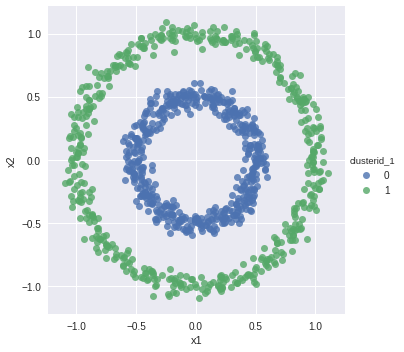

In [52]:
circle_clusters = DBSCAN( eps=.2 )
circle_clusters.fit( circle_points[["x1", "x2"]] )
circle_points["clusterid_1"] = circle_clusters.labels_
sn.lmplot( "x1", "x2", data=circle_points,
        hue = "clusterid_1",
        fit_reg=False, size = 5 )

Automatically created module for IPython interactive environment
n_digits: 10, 	 n_samples 1797, 	 n_features 64
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.36s	69432	0.602	0.650	0.625	0.465	0.598	0.146
random   	0.19s	69694	0.669	0.710	0.689	0.553	0.666	0.147
PCA-based	0.08s	70804	0.671	0.698	0.684	0.561	0.668	0.118
__________________________________________________________________________________


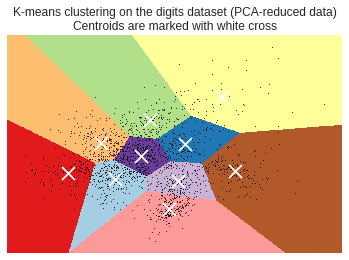

In [57]:
print(__doc__)

from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

np.random.seed(42)

digits = load_digits()
data = scale(digits.data)

n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target

sample_size = 300

print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))


print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')


def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
              name="k-means++", data=data)

bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=10),
              name="random", data=data)

# in this case the seeding of the centers is deterministic, hence we run the
# kmeans algorithm only once with n_init=1
pca = PCA(n_components=n_digits).fit(data)
bench_k_means(KMeans(init=pca.components_, n_clusters=n_digits, n_init=1),
              name="PCA-based",
              data=data)
print(82 * '_')

# #############################################################################
# Visualize the results on PCA-reduced data

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [59]:
#https://pythonprogramminglanguage.com/kmeans-text-clustering/

10

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

documents = ["This little kitty came to play when I was eating at a restaurant.",
             "Merley has the best squooshy kitten belly.",
             "Google Translate app is incredible.",
             "If you open 100 tab in google you get a smiley face.",
             "Best cat photo I've ever taken.",
             "Climbing ninja cat.",
             "Impressed with google map feedback.",
             "Key promoter extension for Google Chrome."]


vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

true_k = 2
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print


print("\n")
print("Prediction")

Y = vectorizer.transform(["chrome browser to open."])
prediction = model.predict(Y)
print(prediction)

Y = vectorizer.transform(["My cat is hungry."])
prediction = model.predict(Y)
print(prediction)


Top terms per cluster:
Cluster 0:
 google
 cat
 best
 climbing
 ninja
 incredible
 app
 translate
 impressed
 map
Cluster 1:
 100
 open
 tab
 smiley
 face
 google
 feedback
 extension
 eating
 climbing


Prediction
[0]
[0]


In [42]:
X, y = make_blobs(n_samples=3000,n_features=2, centers=6,  # defult x has 2 values**
                random_state=0, cluster_std=0.80) #Generate isotropic Gaussian blobs for clustering.
#X:generated samples
#y: cluster mapping of values

In [43]:
slsSeries1 =pd.Series(X[:,0])*100
slsSeries2 =pd.Series(X[:,1])*100

clusterMapping = pd.Series(y)

In [44]:
slsSeries1[0:10]

0   -185.507897
1    741.117198
2    885.736940
3   -105.352243
4    -58.040837
5    143.908728
6    490.312369
7    660.486848
8   -122.888433
9    282.371330
dtype: float64

In [17]:
slsSeries.max()

651.12714186656558

In [13]:
slsSeries.min()

-402.03892865012062

In [18]:
clusterMapping

0       4
1       0
2       0
3       3
4       5
5       4
6       5
7       1
8       5
9       0
10      5
11      3
12      2
13      0
14      2
15      3
16      1
17      3
18      0
19      3
20      0
21      4
22      5
23      1
24      4
25      5
26      1
27      1
28      1
29      0
       ..
2970    1
2971    4
2972    5
2973    5
2974    2
2975    1
2976    3
2977    5
2978    1
2979    5
2980    3
2981    2
2982    3
2983    5
2984    0
2985    3
2986    1
2987    5
2988    1
2989    4
2990    0
2991    4
2992    1
2993    5
2994    0
2995    2
2996    5
2997    4
2998    0
2999    2
Length: 3000, dtype: int64

In [29]:
storeList = pd.Series(np.random.randint(2000,6000, size=3000))

In [30]:
type(storeList)

pandas.core.series.Series

In [51]:
strSls = pd.DataFrame({'store':storeList,'salesTY':slsSeries1,'salesLY':slsSeries2,'cluster':clusterMapping}) # just like you make df from dct

In [52]:
strSls.head()

,cluster,salesLY,salesTY,store
0,2,402.362777,-185.507897,4634
1,4,-428.735162,741.117198,5403
2,4,-306.992400,885.736940,4540
3,2,253.690271,-105.352243,3685
4,2,349.299999,-58.040837,2390


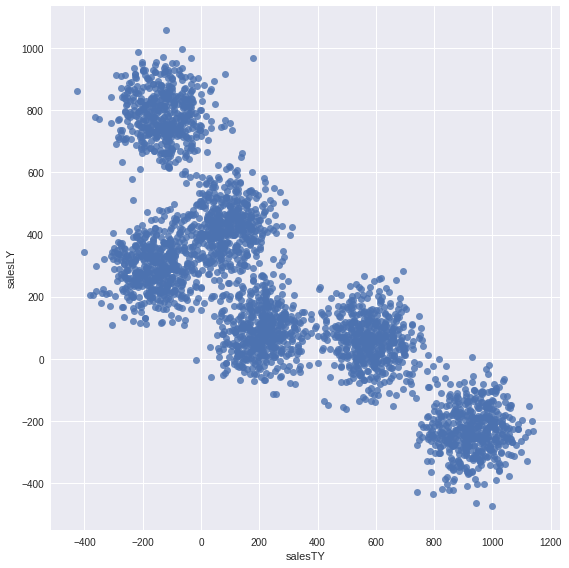

In [56]:
sn.lmplot( "salesTY", "salesLY", data=strSls, fit_reg=False, size = 8 ) # sales datathis year and last year

#Can a clustering algorithm group them together by how nearer they are to each other
Using K-means clustering technique
k-mean calculates the distance between the points and the center using euclidean distance and then allocates the points to different clusters.

In [57]:
from sklearn.cluster import KMeans

In [58]:
KMeans?

In [99]:
X = strSls[["salesLY", "salesTY"]]
clusters = KMeans(n_clusters=3,max_iter=60)  # 3 clusters
clusters.fit( X )
#n_clusters=8, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', 
#verbose=0, random_state=None, copy_x=True, n_jobs=1, algorithm='auto'

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=60,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [100]:
##k-means clustering has figured out the cluster centers and assigned each points to the cluster centers.

In [102]:
clusters.cluster_centers_

array([[ 263.06577721,   47.07589782],
       [ -88.11969135,  755.67537811],
       [ 772.65128698, -118.96444313]])

In [103]:
clusters.labels_

array([0, 1, 1, ..., 1, 0, 1], dtype=int32)

In [105]:
strSls["clusterid_1"] = clusters.labels_

In [106]:
strSls.head()

,cluster,salesLY,salesTY,store,clusterid_1
0,2,402.362777,-185.507897,4634,0
1,4,-428.735162,741.117198,5403,1
2,4,-306.992400,885.736940,4540,1
3,2,253.690271,-105.352243,3685,0
4,2,349.299999,-58.040837,2390,0


We can verify if the clustering is done properly, by coloring the point differently depending on how they are assigned to each cluster.

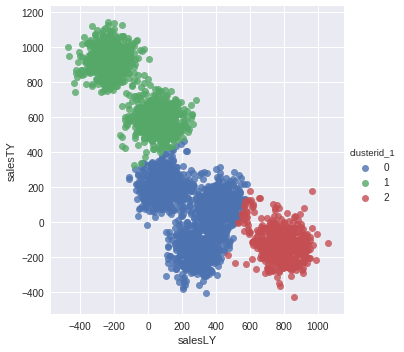

In [107]:
sn.lmplot( "salesLY", "salesTY", data=strSls,
        hue = "clusterid_1",
        fit_reg=False, size = 5 )
# K MEANS ALGORITHM HAS FIGURED OUT 3 CLUSTERS OF STORES,BAED ON TY LY SALES

In [144]:
#WITH 4 CENTROIDS AND 1 ITERATIONS
X = strSls[["salesLY", "salesTY"]]
clusters = KMeans(n_clusters=4,max_iter=3)  # 3 clusters
clusters.fit( X )
#n_clusters=8, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', 
#verbose=0, random_state=None, copy_x=True, n_jobs=1, algorithm='auto'

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=3,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [145]:
strSls["clusterid_2"] = clusters.labels_

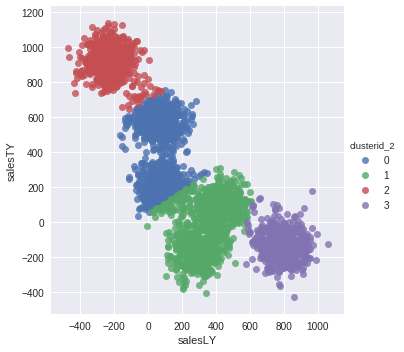

In [146]:
sn.lmplot( "salesLY", "salesTY", data=strSls,
        hue = "clusterid_2",
        fit_reg=False, size = 5 )
# K MEANS ALGORITHM HAS FIGURED OUT 3 CLUSTERS OF STORES,BAED ON TY LY SALES

In [148]:
#WITH 4 CENTROIDS AND 1 ITERATIONS
X = strSls[["salesLY", "salesTY"]]
clusters = KMeans(n_clusters=4,max_iter=1)  # 3 clusters
clusters.fit( X )
#n_clusters=8, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', 
#verbose=0, random_state=None, copy_x=True, n_jobs=1, algorithm='auto'

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [149]:
strSls["clusterid_3"] = clusters.labels_

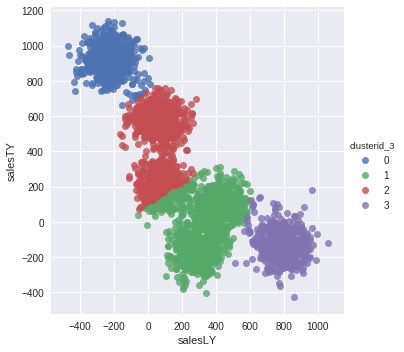

In [150]:
sn.lmplot( "salesLY", "salesTY", data=strSls,
        hue = "clusterid_3",
        fit_reg=False, size = 5 )
# K MEANS ALGORITHM HAS FIGURED OUT 3 CLUSTERS OF STORES,BAED ON TY LY SALES- 
#notice the cluster is different on borders

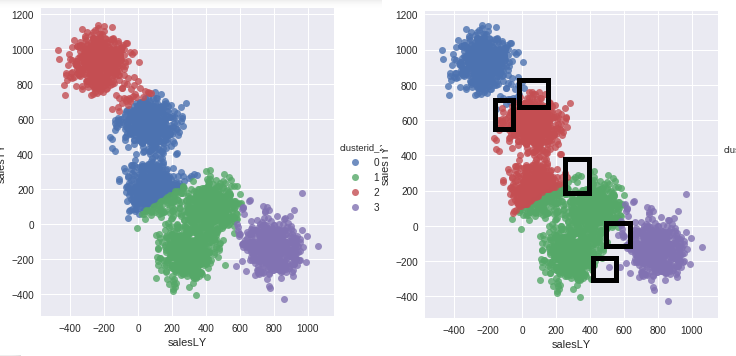

In [1]:
# SEE /home/vijay/DATA_SCIENCE/python/pocketBuddha/pocketBuddha1/clusterKmean/Iteration effect on cluster.png
from IPython.display import Image
Image(filename='Iteration effect on cluster.png')

In [164]:
#WITH 4 CENTROIDS AND 1 ITERATIONS
X = strSls[["salesLY", "salesTY"]]
clusters = KMeans(n_clusters=4,max_iter=500,n_init=50)  # 3 clusters
clusters.fit( X )
#n_clusters=8, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', 
#verbose=0, random_state=None, copy_x=True, n_jobs=1, algorithm='auto'

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
    n_clusters=4, n_init=50, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

max_iter : int, default: 300
    Maximum number of iterations of the k-means algorithm for a
    single run.

n_init : int, default: 10
    Number of time the k-means algorithm will be run with different
    centroid seeds. The final results will be the best output of
    n_init consecutive runs in terms of inertia.

In [165]:
strSls["clusterid_4"] = clusters.labels_

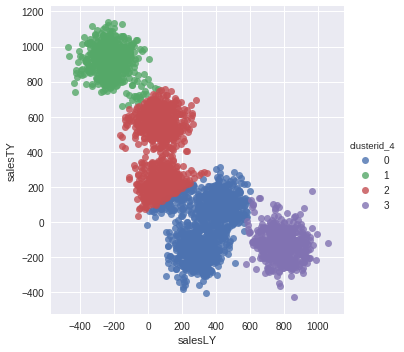

In [166]:
sn.lmplot( "salesLY", "salesTY", data=strSls,
        hue = "clusterid_4",
        fit_reg=False, size = 5 )
# K MEANS ALGORITHM HAS FIGURED OUT 3 CLUSTERS OF STORES,BAED ON TY LY SALES- 
#notice the cluster is different on borders

In [157]:
strSls

,cluster,salesLY,salesTY,store,clusterid_1,clusterid_2,clusterid_3
0,2,402.362777,-185.507897,4634,0,1,1
1,4,-428.735162,741.117198,5403,1,2,0
2,4,-306.992400,885.736940,4540,1,2,0
3,2,253.690271,-105.352243,3685,0,1,1
4,2,349.299999,-58.040837,2390,0,1,1
5,0,458.351089,143.908728,3678,0,1,1
6,5,78.328195,490.312369,3267,1,0,2
7,5,51.411687,660.486848,2331,1,0,2
8,3,748.762750,-122.888433,3135,2,3,3
9,1,107.833604,282.371330,5803,0,0,2


In [158]:
KMeans?